In [13]:
import os, fnmatch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d import axes3d, Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from matplotlib.colors import Normalize
import matplotlib.patches as patches
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, cdist, squareform
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import optunity
import optunity.metrics

In [3]:
amine_name = ['MA', 'EtA', 'nBuA', 'F', 'G', 'Acet']
total_convexhullvolume = [0.52, 29.4, 14.7, 11.8, 11.3, 3.3]
volfrac = [0.67, 0.23, 0.35, 0.67, 0.08, 0.41]
gold = [0.91,1.03,1.19,0.99,1.04,0.90]
FF = [0.89, 0.53, 0.44, 0.65, 0.66, 0.39]
FEF = list(map(lambda x: 1-x, FF))
actualvolfrac = []
for i in range(6):
    actualvolfrac.append(round(volfrac[i]*FF[i],2))

In [4]:
# sort amine name and gold factor based on actualvolfrac value
X = list(zip(actualvolfrac, gold, amine_name))
#X.sort(reverse=True)
actualvolfrac = [i[0] for i in X]
gold = [i[1] for i in X]
amine_name = [i[2] for i in X]

In [5]:
actualvolfrac

[0.6, 0.12, 0.15, 0.44, 0.05, 0.16]

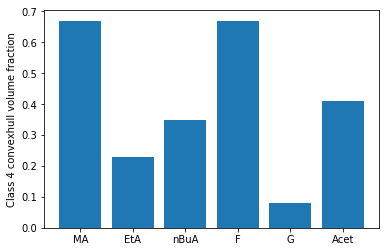

In [6]:
plt1 = plt.bar(np.arange(6), volfrac)
plt.ylabel('Class 4 convexhull volume fraction')
plt.xticks(np.arange(6), amine_name)
plt.savefig('Class 4 convexhull volume fraction_all amine.svg', format = 'svg', dpi = 1000)

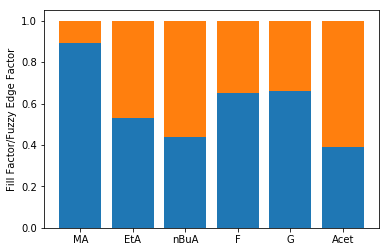

In [7]:
plt2 = plt.bar(np.arange(6), FF)
plt3 = plt.bar(np.arange(6), FEF, bottom = FF)
plt.ylabel('Fill Factor/Fuzzy Edge Factor')
plt.xticks(np.arange(6), amine_name)
plt.savefig('FF+FEF_all amine.svg', format = "svg", dpi = 1000)

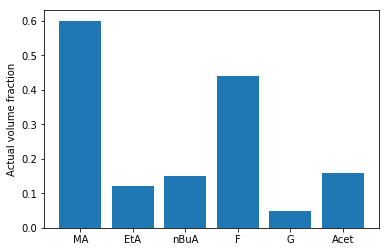

In [8]:
plt4 = plt.bar(np.arange(6), actualvolfrac)
#plt5 = plt.plot(np.arange(6), gold, c = 'grey')
plt.ylabel('Actual volume fraction')
plt.xticks(np.arange(6), amine_name)
plt.savefig('Actual class 4 volume fraction_all amine.svg', format = "svg", dpi = 1000)

amine_name = ['MA', 'EtA', 'nBuA', 'F', 'G', 'Acet']

<function matplotlib.pyplot.show(*args, **kw)>

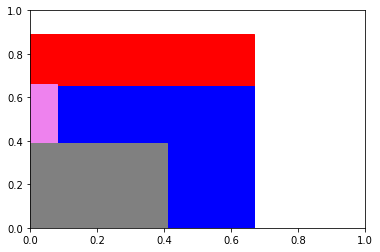

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
colorlist = ['red','yellow','green','blue','violet','gray']
for i in range(6):
    rect = patches.Rectangle((0,0), width = volfrac[i], height = FF[i], edgecolor = colorlist[i], facecolor = colorlist[i], alpha =1)
    ax.add_patch(rect)
plt.savefig("FF-volfrac-box-plot.svg")
plt.show

In [9]:
amine_name2 = ['MA', 'F', 'Acet', 'nBuA', 'EtA', 'G']
total_convexhullvolume2 = [0.52, 11.8,  3.3, 14.7, 29.4, 11.3]
volfrac2 = [0.67, 0.67, 0.41, 0.35, 0.23, 0.08]
gold2 = [0.91,0.99,0.90,1.19,1.03,1.04]
FF2 = [0.89, 0.65, 0.39, 0.44, 0.53, 0.66]
FEF2 = list(map(lambda x: 1-x, FF))
actualvolfrac2 = []
for i in range(6):
    actualvolfrac2.append(round(volfrac2[i]*FF2[i],2))

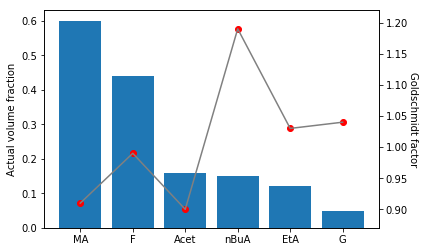

In [10]:
fig, ax1 = plt.subplots()
ax1.bar(np.arange(6),actualvolfrac2)
plt.xticks(np.arange(6), amine_name2)
ax1.set_ylabel('Actual volume fraction')

ax2 = ax1.twinx()
ax2.scatter(np.arange(6), gold2, c = 'red')
ax2.plot(np.arange(6), gold2, c = 'grey')
ax2.set_ylabel('Goldschmidt factor', rotation= 270, labelpad=10)
plt.savefig('Actual class 4 volume fraction_all amine.svg', format = "svg", dpi = 1000)

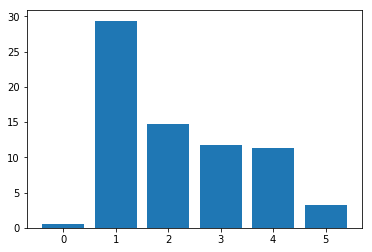

In [11]:
fig, ax = plt.subplots()
ax.bar(np.arange(6),total_convexhullvolume)
#plt.xticks(np.arange(6), amine_name)
#ax.set_ylabel('Total chemical space')
plt.savefig('Convexhull volume_all amine.svg', format = "svg", dpi = 1000)

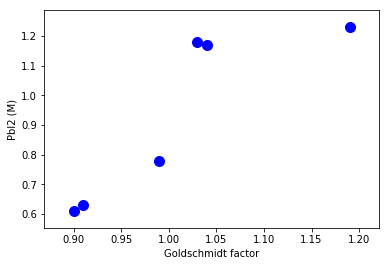

In [12]:
PbI2_center = [0.63, 1.18, 1.23, 0.78, 1.17, 0.61]
plt. scatter(x = gold, y = PbI2_center, s = 100, c = "b")
plt.xlabel("Goldschmidt factor")
plt.ylabel("PbI2 (M)")
plt.savefig("PbI2-Gold factor.png")